In [1]:
import sys
# !{sys.executable} --version
# !{sys.executable} -m pip install tqdm
import joblib
import time
import numpy as np
import pandas as pd
#import tensorflow as tf
from glob import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

In [2]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


In [3]:
datadf = pd.concat([pd.read_pickle(i,compression='gzip') for i in glob("data/*gz")])

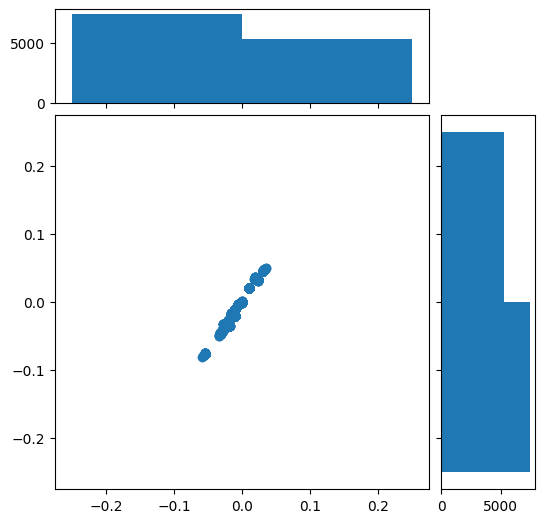

In [4]:
x, y = (datadf['t2start'],datadf['t2'])
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(x, y, ax, ax_histx, ax_histy)

In [5]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate, simila

In [23]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.2)
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

/tmp/ipykernel_164335/2201588441.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted_df.sort_values(by='variable',ascending=False), x='variable', y='value',palette=sns.color_palette('Paired',2))


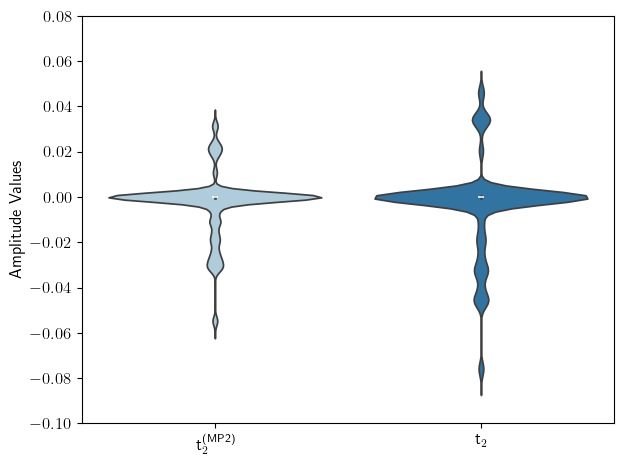

In [27]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


# Rename columns with proper LaTeX formatting
datadf_renamed = datadf.rename(columns={
    't2': r't$_{2}$',
    't2start': r't$_{2}^{\text{(MP2)}}$'
})

# Melt the DataFrame for plotting
melted_df = datadf_renamed.melt(value_vars=[r't$_{2}$', r't$_{2}^{\text{(MP2)}}$'])

# Create the violin plot
sns.violinplot(data=melted_df.sort_values(by='variable',ascending=False), x='variable', y='value',palette=sns.color_palette('Paired',2))
plt.ylabel('Amplitude Values')
plt.xlabel('')
plt.ylim(-0.10,0.08)
# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(os.path.expanduser('~'),'qregress/images/DDCC/amplitude_distribution.png'),dpi=300,bbox_inches='tight')
plt.show()

<Axes: ylabel='t2start'>

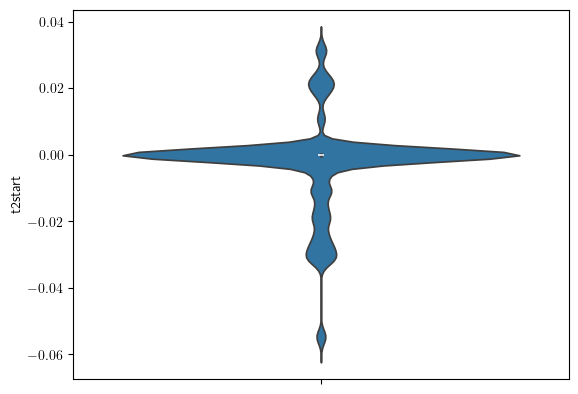

In [7]:
# sns.kdeplot(pd.concat([pd.read_pickle(i,compression='gzip')['t2'] for i in glob("data/*gz")]))
sns.violinplot(x)
# plt.ylim(0,1000)